In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt



In [30]:
# Carregar e preparar os dados
data = pd.read_csv('bostonbin.csv')
X = data.iloc[:, :-1]  # 17 primeiros atributos
y = data.iloc[:, -1]    # Saída binária

# Escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [31]:
#  SVM com Grid-Search
svm_params = {
    'C': [2**i for i in range(-5, 16, 2)],
    'gamma': [2**i for i in range(-15, 4, 2)],
    'kernel': ['rbf']
}
svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_params, cv=KFold(n_splits=10), scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhor SVM
best_svm = grid_search_svm.best_estimator_
best_svm

SVC(C=128, gamma=0.0078125)

In [32]:
# Árvore de Decisão com Grid-Search
tree_params = {
    'max_depth': list(range(1, 11)),
    'min_samples_leaf': list(range(1, 6)),
    'criterion': ['gini']
}
tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(tree, tree_params, cv=KFold(n_splits=10), scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Melhor Árvore de Decisão
best_tree = grid_search_tree.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=1)

In [33]:
# Previsões
y_pred_svm = best_svm.predict(X_test)
y_pred_tree = best_tree.predict(X_test)

In [34]:
# Métricas de desempenho
def print_metrics(y_true, y_pred, model_name):
    print(f"Desempenho do {model_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred):.4f}")
    print(f"Revocação: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}\n")

print_metrics(y_test, y_pred_svm, "SVM")
print_metrics(y_test, y_pred_tree, "Árvore de Decisão")

Desempenho do SVM:
Acurácia: 0.8816
Precisão: 0.9114
Revocação: 0.8675
F1-Score: 0.8889

Desempenho do Árvore de Decisão:
Acurácia: 0.8026
Precisão: 0.9344
Revocação: 0.6867
F1-Score: 0.7917



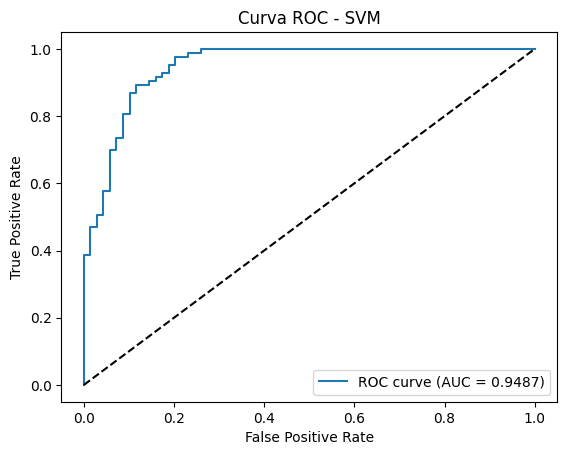

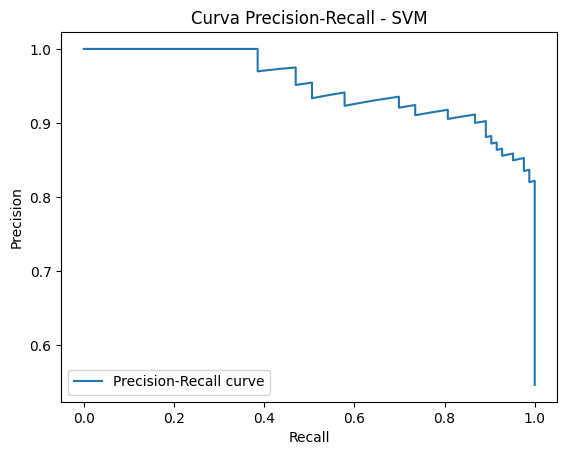

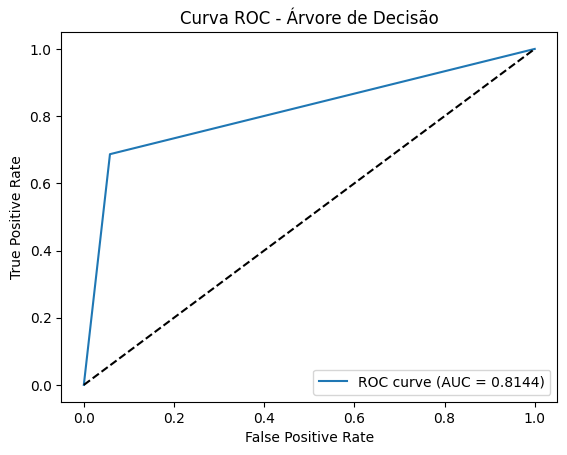

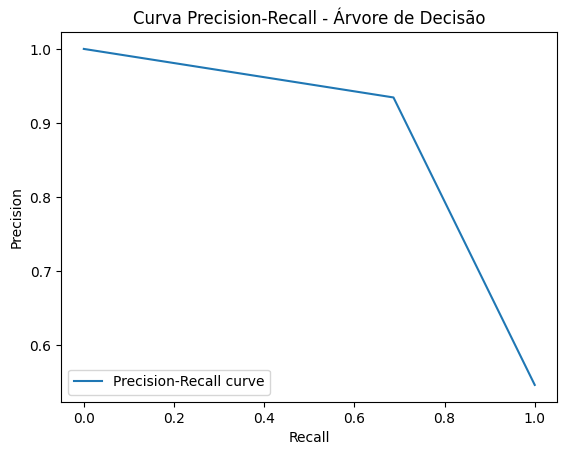

In [35]:
# Curvas ROC e Precision-Recall
def plot_curves(model, X_test, y_test, model_name):
    y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva Precision-Recall - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

plot_curves(best_svm, X_test, y_test, "SVM")
plot_curves(best_tree, X_test, y_test, "Árvore de Decisão")